# **Data Exploration**

### **Dependecies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pycountry

from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

## **Load Data**

In [2]:
from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

# Merge all organization csv's
def merge_responses():
    combined_df = pd.DataFrame()

    for key, values in CONSTANTS.ORGANIZATIONS.items():
        path = f"../../src/responses/response_{values[1]}.json"

        temp_df = pd.read_json(path)


        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

    return combined_df

responses_df = merge_responses()
responses_df.head(5)

,sector_code,iati_identifier,title_narrative,reporting_org_ref,sector_vocabulary,activity_status_code,description_narrative,last_updated_datetime,recipient_country_code,title_narrative_xml_lang,description_narrative_xml_lang,recipient_region_code
0,[14010],DE-1-201920016-0,[Strengthening of Metrology for the Improvemen...,DE-1,[1],2,[With a rapidly growing population and a promi...,2024-02-29T00:00:00Z,[AG],"[en, de]","[en, de, en, de]",NaN
1,[33130],DE-1-201721877-0,[Strengthening regional integration and cooper...,DE-1,[1],3,[The module supports intra-regional partnershi...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[679]
2,[33130],DE-1-201022094-0,[Strengthening quality infrastructure for trad...,DE-1,[1],4,[For the domestic markets of the Member States...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[1029]
3,[33130],DE-1-201222975-0,[Strengthening quality infrastructure for trad...,DE-1,[1],4,[The Southern African Development Community (S...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[1029]
4,[33130],DE-1-201522135-0,[Increase in Trade and Consumer Protection in ...,DE-1,[1],4,[The SADC Protocol on Trade forms the legal ba...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[1029]


In [3]:
responses_df.columns

Index(['sector_code', 'iati_identifier', 'title_narrative',
       'reporting_org_ref', 'sector_vocabulary', 'activity_status_code',
       'description_narrative', 'last_updated_datetime',
       'recipient_country_code', 'title_narrative_xml_lang',
       'description_narrative_xml_lang', 'recipient_region_code'],
      dtype='object')

In [4]:
orga_code_map = {
    "XM-DAC-5-52": "GIZ",
    "XM-DAC-918-3": "EIB",
    44000: "WB",
    "XI-IATI-WBTF": "WBTF",
    "XI-IATI-IADB": "IAD",
    "XM-DAC-46004": "ADB",
    "XM-DAC-46002": "AfDB",
    "XM-DAC-5-7": "AA",
    "DE-1": "BMZ"
}

## **Orgamization Distribution**

In [5]:
orga_value_list = responses_df["reporting_org_ref"].value_counts().to_dict()
orga_value_list

{'DE-1': 31679,
 'XM-DAC-5-7': 7299,
 'XM-DAC-46002': 4512,
 44000: 4316,
 'XM-DAC-46004': 2656,
 'XI-IATI-IADB': 1769,
 'XI-IATI-WBTF': 994,
 'XM-DAC-918-3': 722,
 'XM-DAC-5-52': 48}

In [6]:
responses_df.groupby(['reporting_org_ref', 'activity_status_code']).size().unstack(fill_value=0)

activity_status_code,1,2,3,4,5,6
reporting_org_ref,,,,,,
44000,0,1719,2597,0,0,0
DE-1,0,7980,14279,9420,0,0
XI-IATI-IADB,0,435,58,1276,0,0
XI-IATI-WBTF,0,234,760,0,0,0
XM-DAC-46002,216,673,3455,0,168,0
XM-DAC-46004,1,1230,1384,17,24,0
XM-DAC-5-52,0,33,11,4,0,0
XM-DAC-5-7,211,611,2811,3600,58,8
XM-DAC-918-3,0,380,295,0,47,0


C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_16940\374706188.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orga_names, y=data_series.values, palette="Set3")


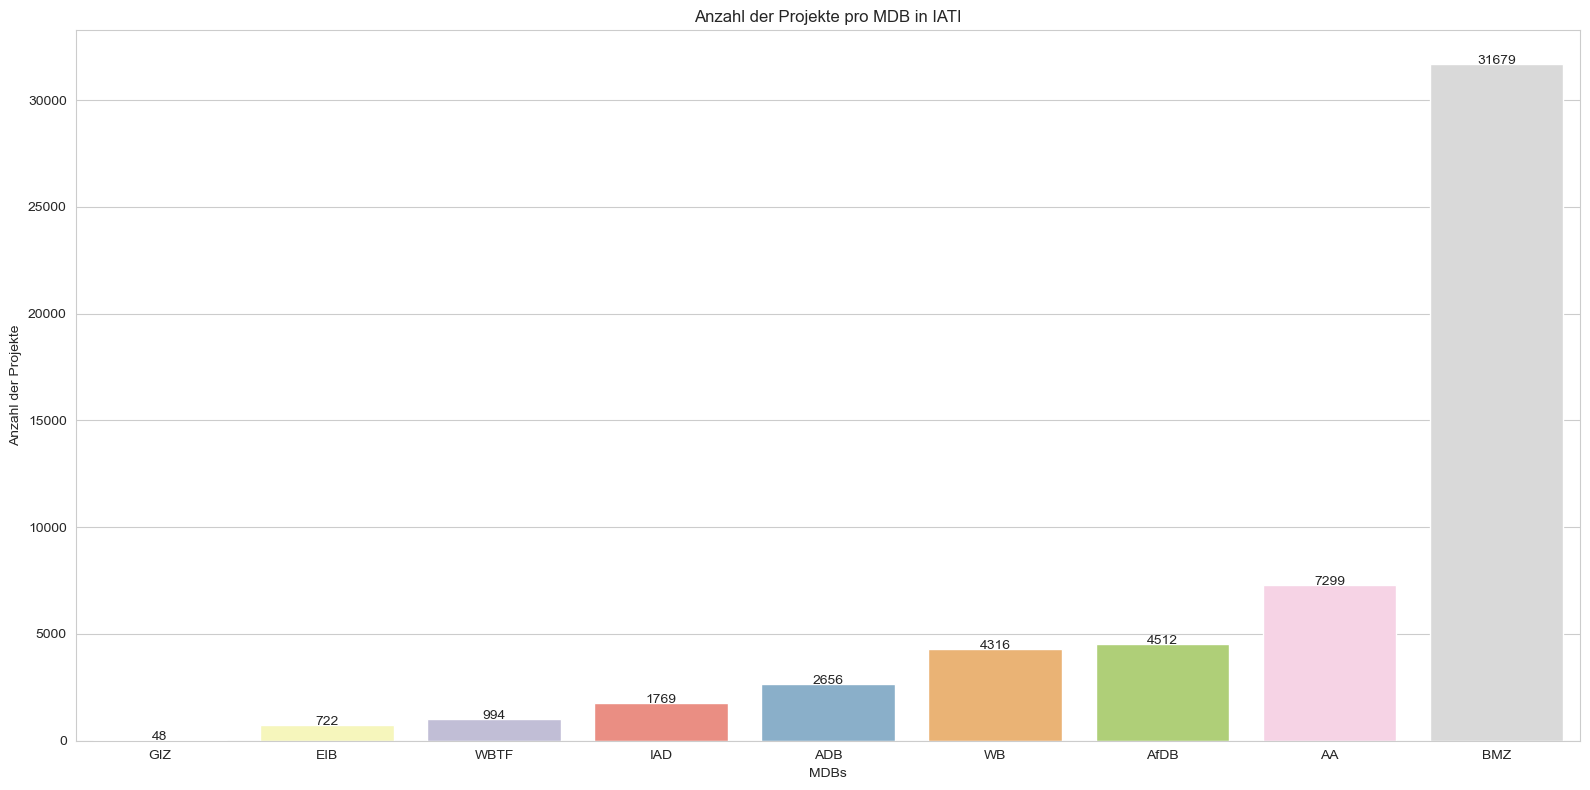

In [7]:
organizations = list(orga_value_list.keys())
counts = list(orga_value_list.values())

data_series = pd.Series(data=counts, index=organizations)
data_series = data_series.sort_values(ascending=True)  

orga_names = [orga_code_map.get(id, "Unknown ID") for id in data_series.index]

sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
sns.barplot(x=orga_names, y=data_series.values, palette="Set3")

for index, value in enumerate(data_series.values):
    plt.text(index, value, str(value), ha='center')  

plt.title('Anzahl der Projekte pro MDB in IATI')
plt.xlabel('MDBs')
plt.ylabel('Anzahl der Projekte')
plt.tight_layout()

plt.savefig('../../src/analysis/mdb_distribution.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

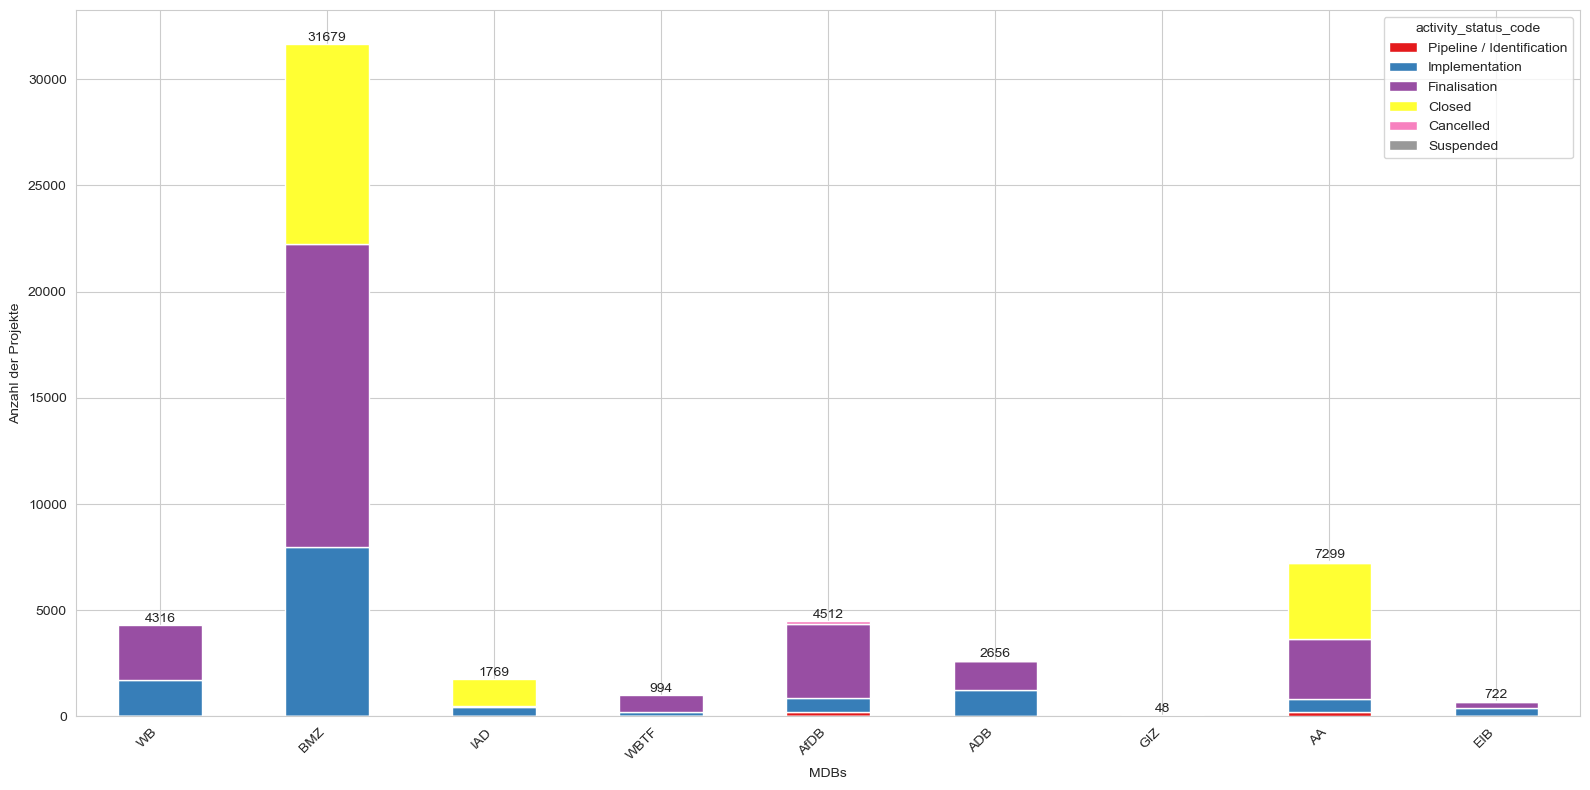

In [8]:
status_descriptions = {
    1: "Pipeline / Identification",
    2: "Implementation",
    3: "Finalisation",
    4: "Closed",
    5: "Cancelled",
    6: "Suspended"
}

aggregated_data = responses_df.pivot_table(index='reporting_org_ref', columns='activity_status_code', aggfunc='size', fill_value=0)
aggregated_data.columns = aggregated_data.columns.map(status_descriptions)


aggregated_data.index = [orga_code_map.get(id, "Unknown ID") for id in aggregated_data.index]

aggregated_data_percentage = aggregated_data.div(aggregated_data.sum(axis=1), axis=0) * 100

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

bar_plot = aggregated_data.plot(kind='bar', stacked=True, colormap='Set1', figsize=(16, 8))

#plt.title('Anzahl der Projekte pro MDB nach dem Projektstatus')
plt.xlabel('MDBs')
plt.ylabel('Anzahl der Projekte')
plt.xticks(rotation=45, ha="right")

"""
for idx, (org, row) in enumerate(aggregated_data.iterrows()):
    cum_height = 0 
    for col_idx, status in enumerate(aggregated_data.columns):
        height = row[status]
        percentage = aggregated_data_percentage.loc[org, status]
        if height > 700:  
            plt.text(idx, cum_height + height/2, f'{percentage:.1f}%', ha='center', va='center')
        cum_height += height 
"""
for n, (index, row) in enumerate(aggregated_data.iterrows()):
    total = row.sum()
    plt.text(n, total, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../../src/analysis/mdb_distribution_by_phase.png')
plt.show()

## **Countries of Projects**

In [9]:
country_counts = {}

# Iterate over each item in the 'recipient_country_code' column
for codes in responses_df['recipient_country_code'].dropna():
    for code in codes:  # Iterate through the list of country codes in each row
        if code in country_counts:
            country_counts[code] += 1  # Increment the count if the code already exists
        else:
            country_counts[code] = 1  # Initialize the count if the code is new

# country_counts now contains the count of appearances for each country code
print(country_counts)

{'AG': 6, 'GE': 524, 'SS': 363, 'LB': 404, 'UA': 886, 'MW': 479, 'NP': 516, 'UG': 670, 'CD': 771, 'CF': 240, 'TJ': 241, 'BO': 700, 'HR': 38, 'EG': 537, 'KH': 554, 'RS': 410, 'MG': 407, 'AZ': 184, 'MM': 461, 'LA': 329, 'AO': 138, 'CI': 315, 'HT': 444, 'KG': 353, 'PK': 722, 'CR': 112, 'PE': 725, 'MX': 490, 'BY': 277, 'ID': 789, 'CM': 583, 'VN': 610, 'VU': 42, 'FJ': 87, 'SZ': 45, 'GY': 63, 'IL': 94, 'GM': 162, 'IR': 35, 'GW': 36, 'PA': 128, 'KZ': 132, 'CV': 119, 'CG': 157, 'TM': 29, 'BT': 86, 'SB': 78, 'FM': 27, 'WS': 48, 'DJ': 83, 'SR': 47, 'RO': 27, 'KP': 13, 'VE': 93, 'CU': 48, 'TH': 147, 'SL': 272, 'MY': 50, 'NA': 263, 'ML': 678, 'BD': 846, 'NG': 634, 'SN': 360, 'ZW': 406, 'YE': 307, 'MA': 524, 'IQ': 420, 'PS': 530, 'TN': 724, 'LR': 258, 'CO': 879, 'HN': 312, 'BW': 91, 'BJ': 357, 'ST': 56, 'SY': 233, 'GH': 509, 'GT': 427, 'RW': 443, 'AL': 293, 'UZ': 260, 'AR': 396, 'JO': 455, 'ET': 861, 'BG': 15, 'EC': 345, 'LK': 343, 'TG': 302, 'BA': 368, 'KE': 867, 'IN': 2475, 'ZM': 380, 'CN': 825, 

In [10]:
country_counts["MM"]

461

C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_16940\1668811060.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


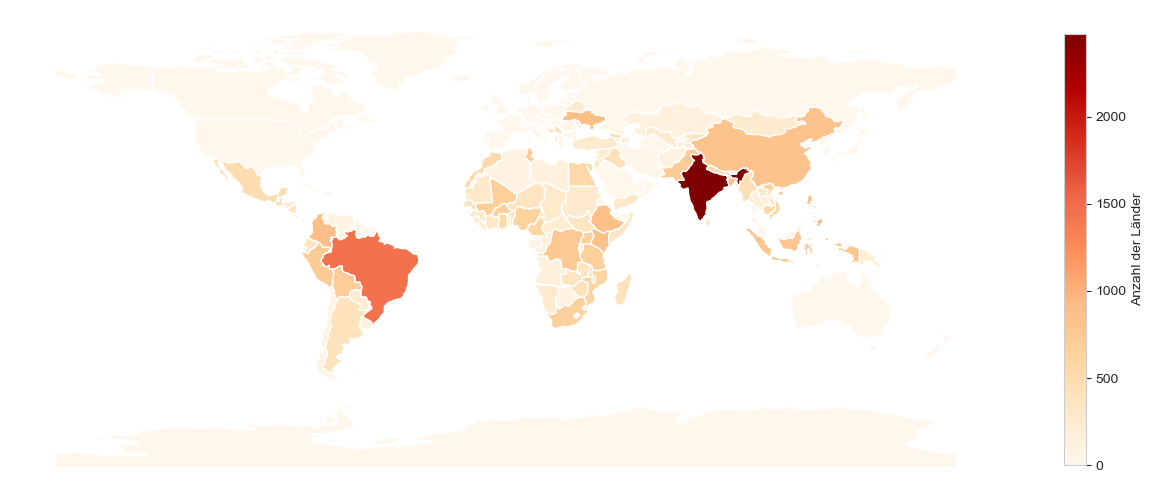

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert ISO alpha-2 codes to alpha-3 codes
country_counts_alpha3 = {}
for alpha2, count in country_counts.items():
        country = pycountry.countries.get(alpha_2=alpha2)
        if country:  # If the country was found
                alpha3 = country.alpha_3
                country_counts_alpha3[alpha3] = count

world['frequency'] = world['iso_a3'].map(country_counts_alpha3).fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
world.plot(column='frequency', ax=ax, legend=True,
        legend_kwds={'label': "Anzahl der Länder", 'shrink': 0.7},
        cmap='OrRd') 
#ax.set_title('Länder von Projekten im IATI Datensatz')
plt.axis('off')  # Hide axes

plt.savefig('../../src/analysis/country_map.png')
plt.show()

In [27]:
responses_df[responses_df["iati_identifier"] == "44000-P151357"]

,sector_code,iati_identifier,title_narrative,reporting_org_ref,sector_vocabulary,activity_status_code,description_narrative,last_updated_datetime,recipient_country_code,title_narrative_xml_lang,description_narrative_xml_lang,recipient_region_code
43544,"[14010, 14020, BH, BC, 000411, 000435, 000041,...",44000-P151357,[Modernization of Public Financial Management ...,44000,"[1, 1, 99, 99, 98, 98, 98, 98, 98]",2,[The project development objective (PDO) is to...,2024-03-28T15:58:33Z,[IQ],NaN,NaN,NaN


In [ ]:
responses_df[responses_df["iati_identifier"] == "44000-P151357"]

,sector_code,iati_identifier,title_narrative,reporting_org_ref,sector_vocabulary,activity_status_code,description_narrative,last_updated_datetime,recipient_country_code,title_narrative_xml_lang,description_narrative_xml_lang,recipient_region_code
43544,"[14010, 14020, BH, BC, 000411, 000435, 000041,...",44000-P151357,[Modernization of Public Financial Management ...,44000,"[1, 1, 99, 99, 98, 98, 98, 98, 98]",2,[The project development objective (PDO) is to...,2024-03-28T15:58:33Z,[IQ],NaN,NaN,NaN


In [13]:
len(responses_df[responses_df["reporting_org_ref"] == "DE-1"])

31679